## Imports

In [1]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
car_filenames = []
not_car_filenames = []

dir_name = 'data/vehicles'
for path, dirs, files in os.walk(dir_name):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        car_filenames.append(name)
        
dir_name = 'data/non-vehicles/'
for path, dirs, files in os.walk(dir_name):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        not_car_filenames.append(name)

In [3]:
car_labels = [1] * len(car_filenames)
not_car_labels = [0] * len(not_car_filenames)

## Basic Summary of Dataset

In [4]:
len(car_filenames), len(not_car_filenames)

(8792, 8968)

In [5]:
len(car_labels), len(not_car_labels)

(8792, 8968)

In [6]:
for i in range(10):
    idx = np.random.randint(len(car_filenames))

    car_image_shape = cv2.imread(car_filenames[idx]).shape
    print(idx, car_image_shape)

2212 (64, 64, 3)
3824 (64, 64, 3)
938 (64, 64, 3)
1236 (64, 64, 3)
7371 (64, 64, 3)
8604 (64, 64, 3)
610 (64, 64, 3)
5548 (64, 64, 3)
6080 (64, 64, 3)
2375 (64, 64, 3)


In [7]:
for i in range(10):
    idx = np.random.randint(len(not_car_filenames))

    not_car_image_shape = cv2.imread(not_car_filenames[idx]).shape
    print(idx, not_car_image_shape)

2174 (64, 64, 3)
69 (64, 64, 3)
2306 (64, 64, 3)
4144 (64, 64, 3)
4248 (64, 64, 3)
8943 (64, 64, 3)
5135 (64, 64, 3)
569 (64, 64, 3)
463 (64, 64, 3)
1878 (64, 64, 3)


## Visualize Some of the Data

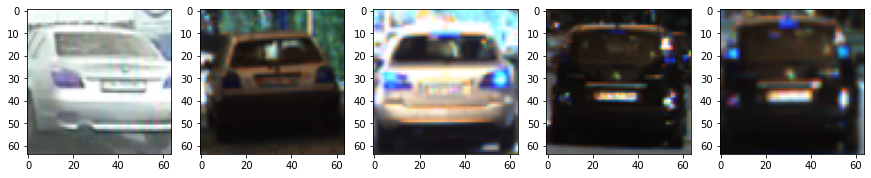

In [8]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(car_filenames))
    img = cv2.imread(car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

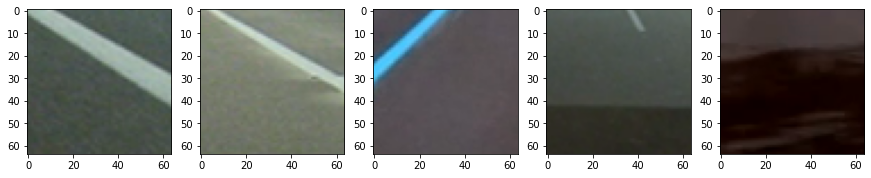

In [9]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(not_car_filenames))
    img = cv2.imread(not_car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

## Feature Extraction Method

In [ ]:
# Raw pixel intensity : (Color and Shape)
# Histogram of pixel intensity : (Color only)
# Gradients of pixel intensity : (Shape only)

In [72]:
features = []

In [ ]:
# Raw pixel intensity : (Color and Shape)

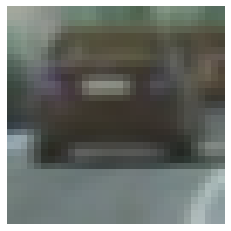

In [16]:
image = cv2.imread(car_filenames[1])
image_32x32 = cv2.resize(image, (32, 32))

image_f = image_32x32.flatten()

plt.imshow(image_32x32, cmap="gray"), plt.axis("off") 
plt.show()

In [15]:
image_32x32.shape

(32, 32, 3)

In [17]:
image_f.shape

(3072,)

In [ ]:
# Histogram of pixel intensity : (Color only)

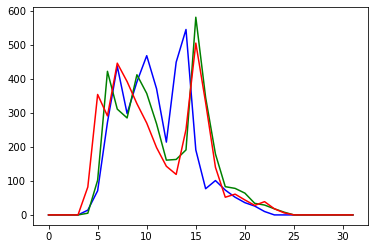

In [38]:
color_list = ['b', 'g', 'r']

hist_f = np.array([])

for i in range(3):
    hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0, 255]).flatten()
    hist_f = np.r_[hist_f, hist]
        
    plt.plot(hist, color=color_list[i])

In [39]:
hist_f.shape

(96,)

In [40]:
type(hist_f)

numpy.ndarray

In [ ]:
# Gradients of pixel intensity : (Shape only)

In [41]:
from skimage.feature import hog

In [66]:
image2 = cv2.imread(car_filenames[1], cv2.IMREAD_GRAYSCALE)

In [67]:
hog_feature, hog_image = hog(image2, orientations=9, pixels_per_cell=(8,8),
                            cells_per_block=(2,2),
                            block_norm='L2-Hys', transform_sqrt=False,
                            visualize=True, feature_vector= True)

In [68]:
hog_feature.shape

(1764,)

In [69]:
np.r_[image_f, hist_f, hog_feature].shape

(4932,)

In [70]:
features.append(np.r_[image_f, hist_f, hog_feature])

In [71]:
len(features)

4

## Feature Extraction

In [81]:
features = []

In [82]:
for i in range(len(car_filenames)):
    
    image = cv2.imread(car_filenames[i])
    image_32x32 = cv2.resize(image, (32, 32))

    image_f = image_32x32.flatten()


    color_list = ['b', 'g', 'r']

    hist_f = np.array([])

    for i in range(3):
        hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0, 255]).flatten()
        hist_f = np.r_[hist_f, hist]

    image2 = cv2.imread(car_filenames[i], cv2.IMREAD_GRAYSCALE)

    hog_feature, hog_image = hog(image2, orientations=9, pixels_per_cell=(8,8),
                                cells_per_block=(2,2),
                                block_norm='L2-Hys', transform_sqrt=False,
                                visualize=True, feature_vector= True)

    features.append(np.r_[image_f, hist_f, hog_feature])

In [83]:
len(features)

8792

In [84]:
features[0].shape

(4932,)

In [85]:
for i in range(len(not_car_filenames)):
    
    image = cv2.imread(not_car_filenames[i])
    image_32x32 = cv2.resize(image, (32, 32))

    image_f = image_32x32.flatten()


    color_list = ['b', 'g', 'r']

    hist_f = np.array([])

    for i in range(3):
        hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0, 255]).flatten()
        hist_f = np.r_[hist_f, hist]

    image2 = cv2.imread(not_car_filenames[i], cv2.IMREAD_GRAYSCALE)

    hog_feature, hog_image = hog(image2, orientations=9, pixels_per_cell=(8,8),
                                cells_per_block=(2,2),
                                block_norm='L2-Hys', transform_sqrt=False,
                                visualize=True, feature_vector= True)

    features.append(np.r_[image_f, hist_f, hog_feature])

In [86]:
len(features)

17760

In [88]:
features[10].shape

(4932,)

## Data Preparation

In [ ]:
train_test_split(X, y)

## Classifier

## Data Saving to Pickle